# Atividade 5

Implementar o Método MTZ em Python, mesmo que não fique de forma 100% automatizada.
Isto é:

* Implementar o problema do Caixeiro Viajante sem nenhuma restrição de subrotas
* Identificar as subrotas que ocorreram
* Escrever as restrições dessas subrotas que ocorreram
* Resolver o problema novamente
* Repetir isso até obter uma solução que não tenha subrotas

# Solução

Implementarei o Problema do Caixeiro Viajante com 5 pontos. Sejam eles

### Variáveis

$x_{ij}$, $i,j \in \{1,2,3,4,5\}$ são as variáveis de movimentação do Caixeiro.

* $x_{ij} = 1$, se o caixeiro passa pelo ponto $p_j$ imediatamente após o ponto $p_i$
* $x_{ij} = 0$, caso contrário

$d_{ij}$, $i,j \in \{1,2,3,4,5\}$ são as distâncias entre os pontos $p_i$ e $p_j$.

Segue a tabela com as coordenadas dos pontos:

![Alt text](coordenadas.png)

E agora, segue a matriz das distâncias euclidianas calculadas:

![Alt text](distancias.png)

### Função Objetivo

Queremos minimizar a distância total percorrida:

$$ \text{Min } Z = \sum_{i=1}^{5} \sum_{j=1}^{5} x_{ij} \cdot d_{ij} $$

### Restrições

As restrições são baseadas nos requisitos nutricionais diários:

1. Cada origem tem somente um destino:

$$ \sum_{j=1}^{5} x_{ij} = 1, \forall i $$


2. Cada destino tem somente uma origem:

$$ \sum_{i=1}^{5} x_{ij} = 1, \forall j $$

In [16]:
!pip install gurobipy
!pip install matplotlib

import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/7.8 MB ? eta -:--:--
     -                                        0.3/7.8 MB 5.2 MB/s eta 0:00:02
     ------                                   1.3/7.8 MB 13.5 MB/s eta 0:00:01
     -------------                            2.6/7.8 MB 18.2 MB/s eta 0:00:01
     ------------------                       3.6/7.8 MB 19.3 MB/s eta 0:00:01
     ------------------------                 4.8/7.8 MB 20.5 MB/s eta 0:00:01
     ------------------------------           6.0/7.8 MB 21.1 MB/s eta 0:00:01
     ------------------------------------     7.1/7.8 MB 21.5 MB/s eta 0:00:01
     ------------------------------------     7.2/7.8 MB 21.9 MB/s eta 0:00:01
     ---------------------------------------  7.8/7.8 MB 20.0 MB/s eta 0:00:01
     ---------------------------------------- 7.8/7.8 MB 18.5 MB/s eta 0:00:00
                                              0.0/217.2 kB ? eta -:--:--
     ------------------------------------- 217.2/217.2 kB 13.8 MB/s

In [31]:
coordenadas = pd.read_csv("auxiliares/arquivos/coordenadas.csv")
distancias = pd.read_csv("auxiliares/arquivos/distancias.csv")

In [32]:
coordenadas

,ponto,x,y
0,p1,0,1
1,p2,2,4
2,p3,-3,8
3,p4,-4,2
4,p5,7,-5


<Axes: title={'center': 'Pontos'}, xlabel='x', ylabel='y'>

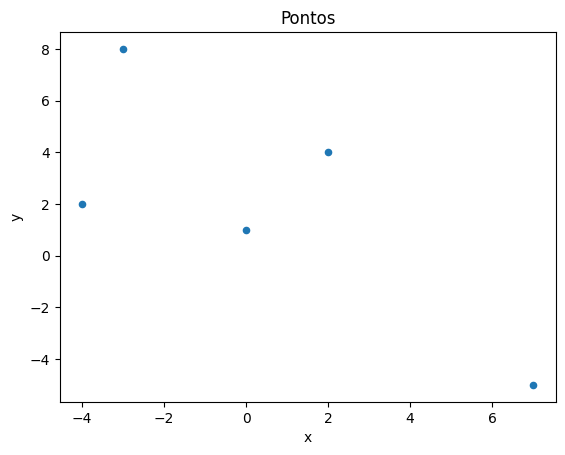

In [30]:
coordenadas.plot.scatter(
    x = 'x'
    ,y = 'y'
    ,title = 'Pontos'
)

In [33]:
distancias

,Unnamed: 0,p1,p2,p3,p4,p5
0,p1,"0,00","3,61","7,62","4,12","9,22"
1,p2,"3,61","0,00","6,40","6,32","10,30"
2,p3,"7,62","6,40","0,00","6,08","16,40"
3,p4,"4,12","6,32","6,08","0,00","13,04"
4,p5,"9,22","10,30","16,40","13,04","0,00"


In [ ]:
def model_ex1(custo_xA=0.5, custo_xB=0.3, custo_xC=0.8, custo_xD=0.2, custo_xE=0.1):
  # Criar um novo modelo
  model_ex1 = gp.Model("dieta_ex1")

  # Criar variáveis de decisão
  x1_1 = model_ex1.addVar(vtype=GRB.CONTINUOUS, name="x1_1")
  x1_2 = model_ex1.addVar(vtype=GRB.CONTINUOUS, name="x1_2")
  x1_3 = model_ex1.addVar(vtype=GRB.CONTINUOUS, name="x1_3")
  x1_4 = model_ex1.addVar(vtype=GRB.CONTINUOUS, name="x1_4")
  x1_5 = model_ex1.addVar(vtype=GRB.CONTINUOUS, name="x1_5")

  # Definir a função objetivo
  model_ex1.setObjective(custo_xA * xA + custo_xB * xB + custo_xC * xC + custo_xD * xD + custo_xE * xE, GRB.MINIMIZE)

  # Adicionar restrição nutriente 1
  model_ex1.addConstr(5 * xA + 4 * xB + 6 * xC + 3 * xD + 2 * xE >= 50, "nutriente_1")

  # Adicionar restrição nutriente 2
  model_ex1.addConstr(1 * xA + 2 * xB + 5 * xC + 3 * xD + 4 * xE >= 20, "nutriente_2")

  # Adicionar restrição nutriente 3
  model_ex1.addConstr(3 * xA + 1 * xB + 4 * xC + 1 * xD + 3 * xE >= 30, "nutriente_3")

  # Resolver o modelo
  model_ex1.optimize()

  for v in model_ex1.getVars():
      print(f"O valor de {v.VarName} é {v.X}")
  print(f"Com isso, o valor da função objetivo é de {model_ex1.ObjVal}")

In [3]:
# Cria o modelo
model = gp.Model("TSP_Iterativo")

# Cria variáveis de decisão
n = 5
x = model.addVars(n, n, vtype=GRB.BINARY, name="x")

# Define a função objetivo
model.setObjective(custo_xA * xA + custo_xB * xB + custo_xC * xC + custo_xD * xD + custo_xE * xE, GRB.MINIMIZE)

In [ ]:
# Definir a função objetivo
